Proyek Akhir Machine Learning Terapan: Recommendation System

Nama: Muhammad Iqbal Fadlillah

Domisili: Kota Bandung, Jawa Barat

Email: m011x0093@dicoding.org, muhammadmif23@gmail.com

Terdapat dua metode yang digunakan pada Recommendation System. Metode pertama adalah Content Based Filtering. Tahap pertama yaitu mendeklarasikan library yang akan digunakan untuk membaca dataset dalam format .csv, melakukan visualisasi data, dan menghilangkan kolom yang tidak dipakai pada data set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Kemudian dilanjutkan ke tahap Data Loading upload dimana dataset akan diupload menggunakan path dari google drive. Dataset merupakan data recommendation system books recomender. Dataset tersebut diambil dari platform Kaggle dengan link berikut: https://www.kaggle.com/code/methoomirza/books-recomender-popular-collaborative-with-webapp/data Dataset terdiri dari dua file yaitu Books.csv dan Ratings.csv

Setelah diupload dataset tersebut dibaca menggunakan library pandas dan disimpan pada variabel book dan rating. Kemudian variabel data dipanggil untuk menampilkan isi Tabel pada dataset tersebut. Dapat dilihat dataset book terdiri dari 271360 baris dan 5 kolom dan dataset rating terdiri dari 1048575 baris dan 3 kolom.  

In [ ]:
book = pd.read_csv('/content/drive/MyDrive/Recomendations/Books.csv')
rating = pd.read_csv('/content/drive/MyDrive/Recomendations/Ratings.csv')

print("Books Shape: ", book.shape)
print("Ratings Shape: ", rating.shape)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Books Shape:  (271360, 5)
Ratings Shape:  (1048575, 3)


Selanjutnya masuk ke tahap Univariate Exploratory Data Analysis dengan cara mengeksplorasi variabel book dengan menggunakan fungsi .info() dapat dilihat variabel book memiliki 5 kolom dengan tipe data object yang memiliki 271360 entri.

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book_Title           271360 non-null  object
 2   Book_Author          271359 non-null  object
 3   Year_Of_Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


Kemudian masuk ke tahap data pre-processing dengan melakukan pengecekan apakah terdapat missing value pada variabel book dengan memanggil fungsi .isnull().sum() dan terdapat 1 missing value pada Book_Author dan 2 missing value pada Publisher.

In [ ]:
book.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            1
Year_Of_Publication    0
Publisher              2
dtype: int64

Missing value yang terdapat pada variabel book dihilangkan dengan memanggil fungs.dropna() dan disimpan pada variabel book_clean. Setelah itu dicek kembali apakah variabel book_clean memiliki missing value atau tidak dan didapati sudah tidak ada missing value. 

In [ ]:
book_clean = book.dropna()
book_clean.isnull().sum()

ISBN                   0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
dtype: int64

Selanjutnya melakukan plot dari variabel book_clean sebanyak 5 data awal untuk mengetahui kolom apa saja yang akan digunakan pada variabel book_clean seperti tabel di bawah ini.

In [ ]:
book_clean.head()

,ISBN,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford_University_Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo_Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar_Straus_Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W._W._Norton_&amp;_Company


Setelah mengetahui kolom apa saja yang akan digunakan, langkah selanjutnya adalah melakukan drop pada kolom yang tidak digunakan yaitu kolom 'Year_Of_Publication'dan 'Book_Author'.

In [ ]:
book = book_clean.drop(columns=['Year_Of_Publication', 'Book_Author'])
book

,ISBN,Book_Title,Publisher
0,195153448,Classical Mythology,Oxford_University_Press
1,2005018,Clara Callan,HarperFlamingo_Canada
2,60973129,Decision in Normandy,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Farrar_Straus_Giroux
4,393045218,The Mummies of Urumchi,W._W._Norton_&amp;_Company
...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Random_House_Childrens_Pub_(Mm)
271356,525447644,From One to One Hundred,Dutton_Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,HarperSanFrancisco
271358,192126040,Republic (World's Classics),Oxford_University_Press


Hal yang sama juga dilakukan pada variabel rating, diawali dengan tahap Univariate Exploratory Data Analysis dengan cara mengeksplorasi variabel rating dengan menggunakan fungsi .info() dapat dilihat variabel book memiliki 2 kolom dengan tipe data int dan 1 kolom object yang memiliki 1048575 entri.

In [ ]:
rating.info()
print('Jumlah UserID: ', len(rating.UserID.unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   UserID       1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book_Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
Jumlah UserID:  95513


Sama seperti sebelumnya, masuk ke tahap data pre-processing dengan melakukan pengecekan apakah terdapat missing value pada variabel rating dengan memanggil fungsi .isnull().sum() dan tidak terdapat missing value disetiap kolomnya.

In [ ]:
rating.isnull().sum()

UserID         0
ISBN           0
Book_Rating    0
dtype: int64

Dilanjutkan dengan melakukan plot dari variabel rating sebanyak 5 data awal untuk mengetahui kolom apa saja yang akan digunakan pada variabel rating seperti tabel di bawah ini.

In [ ]:
rating.head()

,UserID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


Masih dalam tahap pre-processing, selanjutnya adalah menyatukan variabel rating dan book_clean menjadi satu dataframe yang sama menggunakan fungsi pd.merge dari library pandas yang disimpan pada variabel all_book. Dapat dilihat terdapat 1048575 baris dan 5 kolom pada variabel all_book

In [ ]:
all_book = pd.merge(rating, book_clean[['ISBN','Book_Title','Publisher']], on='ISBN', how='left')
all_book

,UserID,ISBN,Book_Rating,Book_Title,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,Ballantine_Books
1,276726,155061224,5,Rites of Passage,Heinle
2,276727,446520802,0,The Notebook,Warner_Books
3,276729,052165615X,3,Help!: Level 1,Cambridge_University_Press
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Cambridge_University_Press
...,...,...,...,...,...
1048570,250764,451410777,0,Sleep Tight (Onyx Book),Onyx_Books
1048571,250764,452264464,8,Beloved (Plume Contemporary Fiction),Plume
1048572,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Dover_Publications
1048573,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Dover_Publications


Selanjutnya masuk ke dalam tahap data preparation, pada tahap ini variabel book_clean dan rating yang sudah disatukan disimpan menjadi variabel all_book. Setelah disatukan perlu dicek kembali apakah terdapat missing value dari variabel tersebut dengan cara yang sama seperti sebelumnya. Dapat dilihat terdapat missing value di atribut Book_Title sebanyak 107466 dan Publisher sebanyak 107466.

In [ ]:
all_book.isnull().sum()

UserID              0
ISBN                0
Book_Rating         0
Book_Title     107466
Publisher      107466
dtype: int64

Sama seperti sebelumnya, untuk menghilangkan missing value menggunakan fungsi .dropna() dan kembali mengecek variabel all_book apakah masih terdapat missing value atau tidak. Berdasarkan hasil dibawah ini dapat dilihat sudah tidak ada missing value pada variabel all_book.

In [ ]:
all_book = all_book.dropna()
all_book.isnull().sum()

UserID         0
ISBN           0
Book_Rating    0
Book_Title     0
Publisher      0
dtype: int64

Dilakukan pendeklarasian variabel all_book untuk mengetahui baris dan kolom yang terdapat pada variabel tersebut.

In [ ]:
all_book

,UserID,ISBN,Book_Rating,Book_Title,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,Ballantine_Books
1,276726,155061224,5,Rites of Passage,Heinle
2,276727,446520802,0,The Notebook,Warner_Books
3,276729,052165615X,3,Help!: Level 1,Cambridge_University_Press
4,276729,521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Cambridge_University_Press
...,...,...,...,...,...
1048570,250764,451410777,0,Sleep Tight (Onyx Book),Onyx_Books
1048571,250764,452264464,8,Beloved (Plume Contemporary Fiction),Plume
1048572,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Dover_Publications
1048573,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Dover_Publications


Karena pada sistem rekomendasi yang akan dibuat akan menghasilkan rekomendasi buku berdasarkan judul bukunya maka perlu diketahui banyaknya judul buku yang terdapat pada dataset yaitu dengan cara mendeklarasikan fungsi len(). Pada fungsi len dimasukan parameter all_book.Book_Title.unique() bertujuan memanggil atribut Book_Title pada variabel all_book.

In [ ]:
print('Banyak judul buku: ', len(all_book.Book_Title.unique()))

Banyak judul buku:  230218


Masih di tahap data preparation, pertama variabel all_book akan disimpan pada variabel preparation. Langkah selanjutnya adalah menghilangkan data ganda pada variabel preparation berdasarkan atribut UserID dengan mendeklarasikan fungsi .drop_duplicates(). Diperoleh jumlah baris sebanyak 83643 yang semula sebanyak 941109.

In [ ]:
preparation = all_book
preparation = preparation.drop_duplicates('UserID')
preparation

,UserID,ISBN,Book_Rating,Book_Title,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,Ballantine_Books
1,276726,155061224,5,Rites of Passage,Heinle
2,276727,446520802,0,The Notebook,Warner_Books
3,276729,052165615X,3,Help!: Level 1,Cambridge_University_Press
5,276733,2080674722,0,Les Particules Elementaires,Flammarion
...,...,...,...,...,...
1048309,250750,60393920,6,Your Own Worst Enemy : Breaking the Habit of A...,Regan_Books
1048348,250751,452283868,9,Sula,Plume_Books
1048349,250757,970635834,5,Emma and the Civil Warrior,Carolina_Moon_Publishing_Company
1048352,250761,821723030,8,Eclipse,Zebra_Books


Tahap selanjutnya adalah melakukan sorting pada atribut UserID secara ascending agar nilai atribut USerID akan berurut dari nilai terkecil hingga terbesar dan disimpan pada variabel fix_book.

In [ ]:
fix_book = preparation.sort_values('UserID', ascending=True)
fix_book

,UserID,ISBN,Book_Rating,Book_Title,Publisher
9561,2,195153448,0,Classical Mythology,Oxford_University_Press
9563,8,2005018,5,Clara Callan,HarperFlamingo_Canada
9581,9,440234743,0,The Testament,Dell
9584,10,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Ryland_Peters_&amp;_Small_Ltd
9586,12,1879384493,10,If I'd Known Then What I Know Now: Why Not Lea...,Cypress_House
...,...,...,...,...,...
9523,278846,60809833,8,Brave New World,Harpercollins
9525,278849,380698439,9,Behind the Attic Wall (Avon Camelot Books (Pap...,HarperTrophy
9529,278851,28630289,0,Frommer's 2000 California (Frommer's Californi...,Frommer's
9552,278852,449907597,8,Dave Barry's Only Travel Guide You'll Ever Need,Ballantine_Books


Kemudian perlu dilakukan konversi data series menjadi list pada atribut UserID, Book_Rating, ISBN, Book_Title, dan Publisher. Dalam hal ini, menggunakan fungsi tolist() dari library numpy. Selanjutnya mengecek apakah jumlah data dari setiap list sudah sama banyak dengan cara mendeklarasikan fungsi len() dari setiap variabel.

In [ ]:
userID = preparation['UserID'].tolist()

book_rating = preparation['Book_Rating'].tolist()

isbn = preparation['ISBN'].tolist()

book_title = preparation['Book_Title'].tolist()

book_publisher = preparation['Publisher'].tolist()
 
print(len(userID))
print(len(book_rating))
print(len(isbn))
print(len(book_title))
print(len(book_publisher))

83643
83643
83643
83643
83643


Masih di tahap data preparation tahap berikutnya adalah membuat dictionary untuk menentukan pasangan key-value pada data userID,isbn, book_rating, book_title, dan book_publisher yang telah disiapkan sebelumnya ke dalam variabel book_rate.

In [ ]:
book_rate = pd.DataFrame({
    'id': userID,
    'isbn': isbn,
    'book_rating': book_rating,
    'book_title': book_title,
    'book_publisher': book_publisher
})
book_rate

,id,isbn,book_rating,book_title,book_publisher
0,276725,034545104X,0,Flesh Tones: A Novel,Ballantine_Books
1,276726,155061224,5,Rites of Passage,Heinle
2,276727,446520802,0,The Notebook,Warner_Books
3,276729,052165615X,3,Help!: Level 1,Cambridge_University_Press
4,276733,2080674722,0,Les Particules Elementaires,Flammarion
...,...,...,...,...,...
83638,250750,60393920,6,Your Own Worst Enemy : Breaking the Habit of A...,Regan_Books
83639,250751,452283868,9,Sula,Plume_Books
83640,250757,970635834,5,Emma and the Civil Warrior,Carolina_Moon_Publishing_Company
83641,250761,821723030,8,Eclipse,Zebra_Books


Tahap berikutnya adalah melakukan drop pada variabel book_rate dikarenakan jumlah dataset yang terlalu besar sebanyak 83643 baris. Variabel book_rate akan di drop pada range (500, 83643) sehingga dataset yang akan digunakan sebanyak 500 sampel data dan disimpan pada variabel book_new. 

In [ ]:
book_new = book_rate.drop(labels=range(500, 83643), axis=0)
book_new

,id,isbn,book_rating,book_title,book_publisher
0,276725,034545104X,0,Flesh Tones: A Novel,Ballantine_Books
1,276726,155061224,5,Rites of Passage,Heinle
2,276727,446520802,0,The Notebook,Warner_Books
3,276729,052165615X,3,Help!: Level 1,Cambridge_University_Press
4,276733,2080674722,0,Les Particules Elementaires,Flammarion
...,...,...,...,...,...
495,278160,044022425X,8,Drums of Autumn,Dell
496,278161,312870582,5,01-01-00: A Novel of the Millennium,Forge
497,278162,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,Arthur_A._Levine_Books
498,278167,671227718,8,TEAMSTERS,Simon_&amp;_Schuster


Selanjutnya dilakukan eksplorasi variabel book_new dengan menggunakan fungsi .info() dapat dilihat variabel book memiliki 5 kolom dengan 3 tipe data object dan 2 int yang memiliki 500 entri.

In [ ]:
book_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              500 non-null    int64 
 1   isbn            500 non-null    object
 2   book_rating     500 non-null    int64 
 3   book_title      500 non-null    object
 4   book_publisher  500 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.4+ KB


Selanjutnya book_new akan disimpan pada variabel baru yaitu data dan dicek apakah variabel book_new sudah memiliki data yang sesuai yang nantinya akan digunakan sebagai dataset.  

In [ ]:
data = book_new
data.sample(5)

,id,isbn,book_rating,book_title,book_publisher
199,277411,044023722X,0,A Painted House,Dell_Publishing_Company
160,277265,615116426,10,Marching Through Culpeper : A Novel of Culpepe...,Edgehill_Books
182,277353,739417096,8,On the Street Where You Live,Simon_Schuster_Macmillan
228,277514,3453042476,7,"Die Feuerzangenbowle (Fiction, Poetry and Drama)",Wilhelm_Heyne_Verlag_GmbH_&amp;_Co_KG
348,277803,142001740,8,The Secret Life of Bees,Penguin_Books


Pada tahap ini, merupakan inti dari model sistem rekomendasi yaitu penentuan metode yang akan digunakan. Pada proyek ini akan digunakan dua metode yaitu Content Based Filtering dan Collaborative Filtering. Teknik pertama yang akan digunakan adalah Content Based Filtering.

Pada metode Content Based Filtering akan dibuat model sistem rekomendasi sederhana berdasarkan publisher yang dimiliki dari sebuah buku. 

Tahap selanjutnya adalah menggunakan teknik TF-IDF Vectorizer. Teknik tersebut akan digunakan pada sistem rekomendasi untuk menemukan representasi fitur penting dari setiap kategori buku. Skor dalam TF-IDF digunakan untuk mengamati istilah-istilah berbeda yang mengandung informasi penting dalam dokumen tertentu. Teknik ini menggunakan fungsi tfidfvectorizer() dari library sklearn.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(data['book_publisher']) 

tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['12',
 '1stbooks_library',
 '_balfour',
 '_brown',
 '_castoldi',
 '_co',
 '_co_kg',
 '_company',
 '_fischer',
 '_frankfurt',
 '_giroux',
 '_gmbh_',
 '_inc',
 '_janes_editores',
 '_jun_verlag_gmbh',
 '_kg_',
 '_knaur_nachf',
 '_knopf',
 '_levine_books',
 '_ltd',
 '_m_books',
 '_martin',
 '_noble_books',
 '_norton_',
 '_row',
 '_s',
 '_schuster',
 '_sons',
 '_sons_inc',
 '_talese',
 '_ullstein_tas',
 '_w_pubns',
 '_wang_pub',
 'ace_books',
 'ace_charter',
 'adams_media_corporation',
 'addison',
 'alfred_a',
 'amp',
 'anchor',
 'anchor_books',
 'apple',
 'arrow',
 'arthur_a',
 'atria',
 'aufbau_tb',
 'avon',
 'avon_books',
 'avon_trade',
 'back_bay_books',
 'baen',
 'baldini_',
 'ballantine_books',
 'ballentyne_',
 'bantam',
 'bantam_books',
 'bantam_doubleday_dell_publishing_group',
 'barbour_publishing',
 'barnes_',
 'beacon_press',
 'berkley_pub_group',
 'berkley_publishing_group',
 'biblioteca_universale_rizzoli',
 'bloomsbury_publishing_plc',
 'bookpeople',
 'broadway',
 'btb_bei_go

Kemudian merubah bentuk fit dan transformasi ke dalam bentuk matriks, dapat dilihat ukuran matriks yang diperoleh adalah 500 x 293. Nilai 500 merupakan ukuran dataset dan 293 merupakan matrik dari atribut book_publisher. 

In [ ]:
tfidf_matrix = tf.fit_transform(data['book_publisher']) 

tfidf_matrix.shape 

(500, 293)

Untuk menghasilkan vektor tf-idf dalam bentuk matriks dapat menggunakan fungsi todense(). Objek matriks dengan bentuk yang sama dan berisi data yang sama yang diwakili oleh matriks sparse, dengan urutan memori yang diminta.

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Tahap selanjutnya adalah membuat dataframe untuk melihat matriks tf-idf yang telah dibuat pada proses sebelumnya. Kolom diisi dengan publisher buku dan bari diisi dengan judul bukui. Data frame yang dihasilkan berjumlah 20 sampel acak judul buku, dan 10 sampel acak publisher.

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.book_title
).sample(20, axis=1).sample(10, axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,biblioteca_universale_rizzoli,editores_mexicanos_unidos,addison,fireside,schoenhofs_foreign_books,_martin,penguin_usa_,_noble_books,harper_,bantam,fischer_,do,ediciones_b,baen,trafalgar_square,macmillan,st_martins_pr,client_distribution_services,barbour_publishing,bloomsbury_publishing_plc
book_title,,,,,,,,,,,,,,,,,,,,
Girl in Hyacinth Blue,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mutant Message: Down Under,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Oceano Mare,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Day of Reckoning,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Field of Dishonor (Honor Harrington Series, Book 4)",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
The Sigma Protocol,0.0,0.0,0.0,0.0,0.0,0.563221,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The moon and sixpence,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Reader,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Selanjutnya masuk ke tahap cosine similarity, pada tahap ini judul buku yang akan dihasilkan akan dihitung similaritynya berdasarkan matriks tfidf yang sudah dihasilkan sebelumnya menggunakan fungsi cosine_similarity(tf-idf matrix).

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Sama seperti pada tf-idf, pada cosine similarity juga dibuat dataframe yang berisikan matriks hasil cosine similarity untuk membandingkan kemiripan antara judul satu buku dengan buku lainnya. 

Bentuk matriks cosine similarity adalah (500, 500) menandakan seluruh dataset sudah diidentifikasi menggunakan cosine similarity. Selanjutnya, ditampilkan sampel acak sebanyak 10 sampel pada baris dan kolom. Banyak judul buku yang tidak sesuai karena nilai yang diperoleh sebesar 0 dikarenakan data sampel diambil secara acak dan menyebabkan masih banyak judul buku yang tidak muncul.

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (500, 500)


book_title,The Secret Life of Bees,Without Remorse,Por los pelos,The Bean Trees,The Second Summer of the Sisterhood,Who Says Elephants Can't Dance? Inside IBM's Historic Turnaround,Ein trÃ?Â¼gerisches Bild.,Goodnight Kiss (Fear Street Super Chiller),The Kid Who Ran for President,The Swiss Account
book_title,,,,,,,,,,
Something Blue: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brighton Rock CB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Temperatursprung: Deutsche VerhÃ¤ltnisse (Edition Suhrkamp),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Kid Who Ran for President,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"Elizabeth I: Red Rose of the House of Tudor, England, 1544 (The Royal Diaries)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Girl with a Pearl Earring,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Man in Full,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Once Bitten, Twice Shy : Love's Sting; The Wedding Effect",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Rainmaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tahap selanjutnya adalah membuat fungsi book_recommendations dengan beberapa parameter sebagai berikut:


nama_buku : nama buku berdasarkan index kemiripan dataframe.

similarity_data : Dataframe mengenai similarity yang telah diidentifikasi sebelumnya yaitu cosine_sim_df.

items : nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah book_title dan book_publisher.

k : Banyak rekomendasi yang ingin diberikan.


Fungsi book_recommendations akan diambil k jumlah dengan nilai similarity terbesar pada index matrix yang diberikan (i).

In [ ]:
def book_recommendations(nama_buku, similarity_data=cosine_sim_df, items=data[['book_title', 'book_publisher']], k=5):
 
    index = similarity_data.loc[:,nama_buku].to_numpy().argpartition(
        range(-1, -k, -1))
    
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(nama_buku, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

Tahap selanjutnya adalah mengambil satu sampel buku yang berada pada dataset dalam kasus ini berada di dalam variabel data. Saya mengambil contoh untuk memasukan judul buku The Sigma Protocol.

In [ ]:
data[data.book_title.eq('The Sigma Protocol')]

,id,isbn,book_rating,book_title,book_publisher
186,277367,312276885,10,The Sigma Protocol,St._Martin's_Press


Selanjutnya adalah menguji coba apakah sistem rekomendasi sudah berjalan dengan baik dengan cara memanggil fungsi book_recommendations dan mengisi parameter dengan judul buku yang ingin dicari similaritynya berdasarkan publisher buku tersebut. Diperoleh 5 judul buku yang memiliki kemiripin yang sama dengan buku The Sigma Protocol berdasarkan book_publishernya.

Maka sistem rekomendasi menggunakan metode Content Based Filtering sudah berhasil dibuat dengan menghasilkan output berupa Top-N Recommendation.

In [ ]:
book_recommendations('The Sigma Protocol')

,book_title,book_publisher
0,Trunk Music (Detective Harry Bosch Mysteries),St._Martin's_Press
1,The Far Pavilions,St._Martin's_Press
2,The Last Coyote (Last Coyote),St._Martin's_Press
3,Biggie and the Mangled Mortician (Dead Letter ...,St._Martin's_Press
4,Ten Big Ones: A Stephanie Plum Novel,St._Martin's_Press


Metode kedua adalah Collaborative Filtering yaitu membuat sistem rekomendasi berdasarkan pengalaman user yang sudah membaca buku tertentu. Kemudian sistem akan merekomendasikan buku yang belum pernah dibaca oleh user. Langkah pertama yang dilakukan adalah mendeklarasikan library yang akan digunakan.

In [ ]:
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Dataset yang digunakan masih sama seperti sebelumnya yaitu variabel book_new yang sekarang disimpan pada variabel df agar tidak menimpa variabel sebelumnya.

In [ ]:
df = book_new
df

,id,isbn,book_rating,book_title,book_publisher
0,276725,034545104X,0,Flesh Tones: A Novel,Ballantine_Books
1,276726,155061224,5,Rites of Passage,Heinle
2,276727,446520802,0,The Notebook,Warner_Books
3,276729,052165615X,3,Help!: Level 1,Cambridge_University_Press
4,276733,2080674722,0,Les Particules Elementaires,Flammarion
...,...,...,...,...,...
495,278160,044022425X,8,Drums of Autumn,Dell
496,278161,312870582,5,01-01-00: A Novel of the Millennium,Forge
497,278162,059035342X,10,Harry Potter and the Sorcerer's Stone (Harry P...,Arthur_A._Levine_Books
498,278167,671227718,8,TEAMSTERS,Simon_&amp;_Schuster


Selanjutnya adalah tahap data preparation. Pada tahap ini, fitur ‘id’ pada data akan disandikan (encode) ke dalam indeks integer. hasil dari encode adalah dengan hasil seperti berikut.

In [ ]:
user_ids = df['id'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276725, 276726, 276727, 276729, 276733, 276744, 276746, 276747, 276748, 276751, 276754, 276755, 276762, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276804, 276808, 276811, 276813, 276814, 276817, 276820, 276822, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276859, 276861, 276862, 276866, 276869, 276872, 276875, 276878, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276936, 276939, 276949, 276950, 276953, 276954, 276957, 276963, 276964, 276975, 276984, 276986, 276988, 276989, 276994, 276997, 276998, 277002, 277009, 277010, 277012, 277018, 277019, 277023, 277028, 277031, 277032, 277035, 277036, 277040, 277042, 277048, 277051, 277053, 277056, 277065, 277072, 277073, 277079, 277085, 277087, 277094, 277096, 277107, 277109, 277114, 277116, 277123, 277124, 277128, 277134, 277135, 277139, 277142, 277143, 2

Sama halnya dengan fitur ‘id’, fitur 'isbn' pada data juga akan disandikan (encode) ke dalam indeks integer. hasil dari encode adalah dengan hasil seperti berikut.

In [ ]:
book_ids = df['isbn'].unique().tolist()

book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}

book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

Tahap berikutnya adalah memetakan (mapping) id yang sudah di encode ke dalam dataframe user dan isbn ke dataframe book.

In [ ]:
df['user'] = df['id'].map(user_to_user_encoded)
 
df['book'] = df['isbn'].map(book_to_book_encoded)

Selanjutnya cek beberapa hal dalam data seperti jumlah user, jumlah buku, dan mengubah nilai rating menjadi float serta menghitung nilai min max dari atribut book_rating kemudian print hasilnya.

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)
 
num_book = len(book_encoded_to_book)
print(num_book)
 
df['rating'] = df['book_rating'].values.astype(np.float32)
 
min_rating = min(df['book_rating'])
 
max_rating = max(df['book_rating'])
 
print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

500
473
Number of User: 500, Number of Book: 473, Min Rating: 0, Max Rating: 10


Tahap berikutnya adalah mengacak dataset sebelum dilakukan pembagian dataset  data training dan validasi. Dataset diacak agar sebaran data lebih random, digunakan parameter randomstate dengan nilai 42 dan parameter frac merupakan nilai float.

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,id,isbn,book_rating,book_title,book_publisher,user,book,rating
361,277823,140345353,8,The Devil's Arithmetic,Puffin_Books,361,340,8.0
73,276954,971880107,0,Wild Animus,Too_Far,73,73,0.0
374,277838,440414806,0,Holes (Yearling Newbery),Yearling,374,129,0.0
155,277253,380807343,9,Coraline,HarperTrophy,155,155,9.0
104,277072,1573229571,9,About a Boy (Movie Tie-In),Riverhead_Books,104,104,9.0
...,...,...,...,...,...,...,...,...
106,277079,3499263998,4,Eine Zierde in ihrem Hause. Die Geschichte der...,Wunderlich_im_Rowohlt,106,106,4.0
270,277622,671025368,10,The Coldest Winter Ever,Pocket,270,87,10.0
348,277803,142001740,8,The Secret Life of Bees,Penguin_Books,348,336,8.0
435,278007,60928336,0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Perennial,435,371,0.0


Setelah dataset diacak dilanjutkan membagi dataset menjadi data train dan validasi dengan komposisi 90:10. Namun sebelum membagi, perlu ada pemetaan (mapping) data user dan book menjadi satu value yang sama dan juga membuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training. 

In [ ]:
x = df[['user', 'book']].values
 
y = df['book_rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[361 340]
 [ 73  73]
 [374 129]
 [155 155]
 [104 104]
 [394 373]
 [377 357]
 [124 124]
 [ 68  68]
 [450 424]
 [  9   9]
 [194 194]
 [406 385]
 [ 84  84]
 [371 352]
 [388 367]
 [495 468]
 [ 30  30]
 [316 306]
 [408 386]
 [490 463]
 [491 464]
 [280 272]
 [356 341]
 [ 76  76]
 [461 435]
 [497 470]
 [211 209]
 [101 101]
 [334 324]
 [475 448]
 [336 326]
 [440 414]
 [173 173]
 [  2   2]
 [333 323]
 [409 387]
 [ 70  70]
 [209 207]
 [ 63  63]
 [384 363]
 [ 93  93]
 [485 458]
 [185 185]
 [ 33  33]
 [ 77  77]
 [  0   0]
 [ 11  11]
 [415 392]
 [ 22  22]
 [ 72  72]
 [182 182]
 [131 131]
 [410  73]
 [193 193]
 [ 55  55]
 [148 148]
 [ 18  18]
 [204 202]
 [ 78  78]
 [494 467]
 [262 256]
 [323 313]
 [483 456]
 [ 79  79]
 [ 39  39]
 [451 425]
 [ 46  46]
 [238  73]
 [391 370]
 [352 338]
 [341 330]
 [277 269]
 [290 282]
 [317 307]
 [304 295]
 [268 262]
 [ 69  69]
 [455 429]
 [465 439]
 [154 154]
 [ 82  82]
 [477 450]
 [172 172]
 [321 311]
 [ 90  90]
 [180 180]
 [414 391]
 [312 303]
 [278 270]
 [381 360]

Tahap selanjutnya adalah proses training, sebelum melakukan proses training dibuat class RecommenderNet dengan library keras. Model akan menghitung skor kecocokan antara user dan book dengan teknik embedding. Pada fungsi tersebut dilakukan proses embedding terhadap data user dan book. Setelah itu dilakukan operasi dot product antara user_vector dan book_vector, user_vector dan book_vector berisikan embedding dari user dan book itu sendiri. Nilai kecocokan yang diperoleh akan memiliki nilai dalam skala [0,1] dengan fungsi aktivasi sigmoid.

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_book, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_book = num_book
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(
            num_book,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.book_bias = layers.Embedding(num_book, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])
        dot_user_book = tf.tensordot(user_vector, book_vector, 2)
        x = dot_user_book + user_bias + book_bias
        return tf.nn.sigmoid(x)

Selanjutnya melakukan proses compile pada model, model berisikan fungsi RecommenderNet yang sudah dideklarasikan sebelumnya. model.compile memiliki beberapa nilai parameter yaitu Binary Crossentropy untuk menghitung nilai loss function, kemudian Adam Adaptive Moment Estimation sebagai parameter optimizer dengan learning rate sebesar 0.0001, dan root mean squared error (RMSE) sebagai metrics evaluation yang digunakan pada model tersebut. 

In [ ]:
model = RecommenderNet(num_users, num_book, 50) 
 
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    run_eagerly= True,
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Selanjutnya dilakukan training pada model dengan memanggil fungsi model.fit() yang didalamnya dideklarasikan beberapa parameter seperti data latih dari atribut dan label, batch_size yang digunakan sebesar 8, epoch sebesar 25, dan vaildation data pada variabel x_val y_val.

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 25,
    validation_data = (x_val, y_val)
)

Epoch 1/25
57/57 [==============================] - 2s 28ms/step - loss: 0.8860 - root_mean_squared_error: 0.3968 - val_loss: 0.8718 - val_root_mean_squared_error: 0.3998
Epoch 2/25
57/57 [==============================] - 2s 27ms/step - loss: 0.8672 - root_mean_squared_error: 0.3937 - val_loss: 0.8609 - val_root_mean_squared_error: 0.3998
Epoch 3/25
57/57 [==============================] - 2s 29ms/step - loss: 0.8575 - root_mean_squared_error: 0.3939 - val_loss: 0.8518 - val_root_mean_squared_error: 0.3998
Epoch 4/25
57/57 [==============================] - 2s 28ms/step - loss: 0.8493 - root_mean_squared_error: 0.3941 - val_loss: 0.8437 - val_root_mean_squared_error: 0.3999
Epoch 5/25
57/57 [==============================] - 2s 28ms/step - loss: 0.8401 - root_mean_squared_error: 0.3931 - val_loss: 0.8366 - val_root_mean_squared_error: 0.3999
Epoch 6/25
57/57 [==============================] - 2s 29ms/step - loss: 0.8297 - root_mean_squared_error: 0.3909 - val_loss: 0.8301 - val_root_m

Selanjutnya memplot hasil training model ke dalam bentuk grafik dengan sumbu y sebagai nilai loss dan sumbu x sebagai banyaknya epoch.

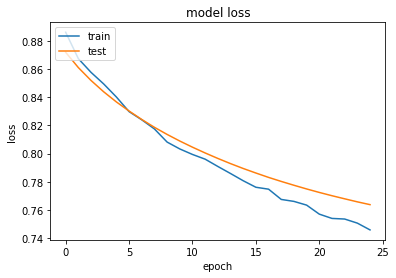

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

Tahap selanjutnya untuk mendapatkan sistem rekomendasi buku adalah mendeklarasikan sampel user_id secara acak (dalam kasus ini saya mengambil sampel dari user id 276744) kemudian mendefinisikan variabel book_read_by_user yang merupakan daftar book yang sudah pernah dibaca oleh user tersebut. Kemudian mendeklarasikan variabel book_not_read merupakan daftar buku yang belum pernah dibaca oleh user tersebut. Variabel book_not_read nantinya akan menjadi acuan dari buku  yang direkomendasikan. 

In [ ]:
book_df = book_new
df = pd.read_csv('/content/drive/MyDrive/Recomendations/Ratings.csv')
 
user_id = 276744
book_read_by_user = df[df.UserID == user_id]

book_not_read = book_df[~book_df['id'].isin(book_read_by_user.ISBN.values)]['isbn'] 
book_not_read = list(
    set(book_not_read)
    .intersection(set(book_to_book_encoded.keys()))
)
 
book_not_read = [[book_to_book_encoded.get(x)] for x in book_not_read]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_read), book_not_read)
)

Tahap terakhir untuk memperoleh hasil rekomendasi buku dengan N-Top recommendation seperti contoh pada modul adalah dengan cara mendeklarasikan model.predict() dimana model merupakan hasil training sebelumnya. Hasil dari prediksi akan menampilkan 10 jenis buku yang sesuai dengan user_id yang sudah dideklarasikan sebelumnya. Buku yang ditampilkan berdasarkan perkiraan rating tertinggi yang akan diberikan user_id terhadap buku yang belum pernah dibaca dikarenakan metode ini merupakan metode Collaborative Filtering dengan hasil seperti dibawah. 

In [ ]:
ratings = model.predict(user_book_array).flatten()
 
print('----' * 8)
print('Top 10 books recommendation')
print('----' * 8)
book_recommendation = pd.DataFrame({
    'isbn': book_ids,
    'ratings': ratings
})
final_book_recommendation = book_recommendation.sort_values(by='ratings', ascending=False)
final_book_recommendation = final_book_recommendation.merge(book_new, left_on='isbn', right_on='isbn')
book_recommendation_clean = final_book_recommendation.drop(columns=['book_rating','user', 'book', 'rating', 'book_publisher'])
book_recommendation_clean.head(10)


--------------------------------
Top 10 books recommendation
--------------------------------


,isbn,ratings,id,book_title
0,425173739,0.548134,277782,Death on the Nile (Hercule Poirot Mysteries (P...
1,671522728,0.547028,277826,"Lucky, Lucky Day (Full House Michelle)"
2,140118993,0.546442,277830,Tupelo Nights (Contemporary American Fiction)
3,3442729785,0.544645,277457,Melancholie Der Ankunft
4,786811358,0.544454,277831,Jenius: The Amazing Guinea Pig (Hyperion Chapt...
5,553148001,0.544378,277506,The Clan of the Cave Bear : a novel
6,142001740,0.544192,277803,The Secret Life of Bees
7,142001740,0.544192,277958,The Secret Life of Bees
8,804107149,0.544188,277832,Ordinary Love and Good Will
9,440228441,0.542888,277797,I Know What You Did Last Summer
